In [30]:
import rasterio
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
from collections import OrderedDict
from shapely.geometry import Point, Polygon
from pathlib import Path
import os
import json
from rasterio.enums import ColorInterp
from rasterio.enums import Resampling
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from fastcore.utils import *
%load_ext autoreload
%autoreload 2
%matplotlib  inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Wikipedia has a list of the world' drying lakes:
https://en.wikipedia.org/wiki/List_of_drying_lakes



In [ ]:
# run this script to download the s2cloudless data
!python s2cloudless_dataset.py

In [4]:
data_directory = Path("/media/wwymak/Storage/surface_water_changes_satellite_data")
s2_cloudless_data_directory = data_directory / "s2cloudless"

In [5]:
s2_cloudless_data_directory.ls()[:5]

(#5) [Path('/media/wwymak/Storage/surface_water_changes_satellite_data/s2cloudless/ramganga_india_78.0_29.0_78.0_29.0_s2cloudless.jpg'),Path('/media/wwymak/Storage/surface_water_changes_satellite_data/s2cloudless/qinhai_china_99.0_35.0_101.0_37.0_s2cloudless.jpg'),Path('/media/wwymak/Storage/surface_water_changes_satellite_data/s2cloudless/menocino_usa_-124.0_39.0_-124.0_39.0_s2cloudless-2018.jpg'),Path('/media/wwymak/Storage/surface_water_changes_satellite_data/s2cloudless/salton_sea_us_-117.0_32.0_-116.0_33.0_s2cloudless-2018.jpg'),Path('/media/wwymak/Storage/surface_water_changes_satellite_data/s2cloudless/salda_turkey_29.0_37.0_29.0_37.0_s2cloudless-2019.jpg')]

In [6]:
sites = ['aral_sea',
 'balaton_hungary',
 'burdur_turkey',
 'copais_lake_greece',
 'elephant_butte_reservoir_usa',
 'faguibine_mali',
 'koroenia_greece',
 'mead_mojave_usa',
 'menocino_usa',
 'mono_usa',
 'poopo_bolivia',
 'qinhai_china',
 'ramganga_india',
 'salda_turkey',
 'salton_sea_us',
 'urmia_iran',
 'walker_usa']

In [7]:
s2_cloudless_image_paths = s2_cloudless_data_directory.ls()
site_to_imag_map = {}
for site in sites:
    images = [x for x in s2_cloudless_image_paths if x.stem.startswith(site)]
    site_to_imag_map[site] = images

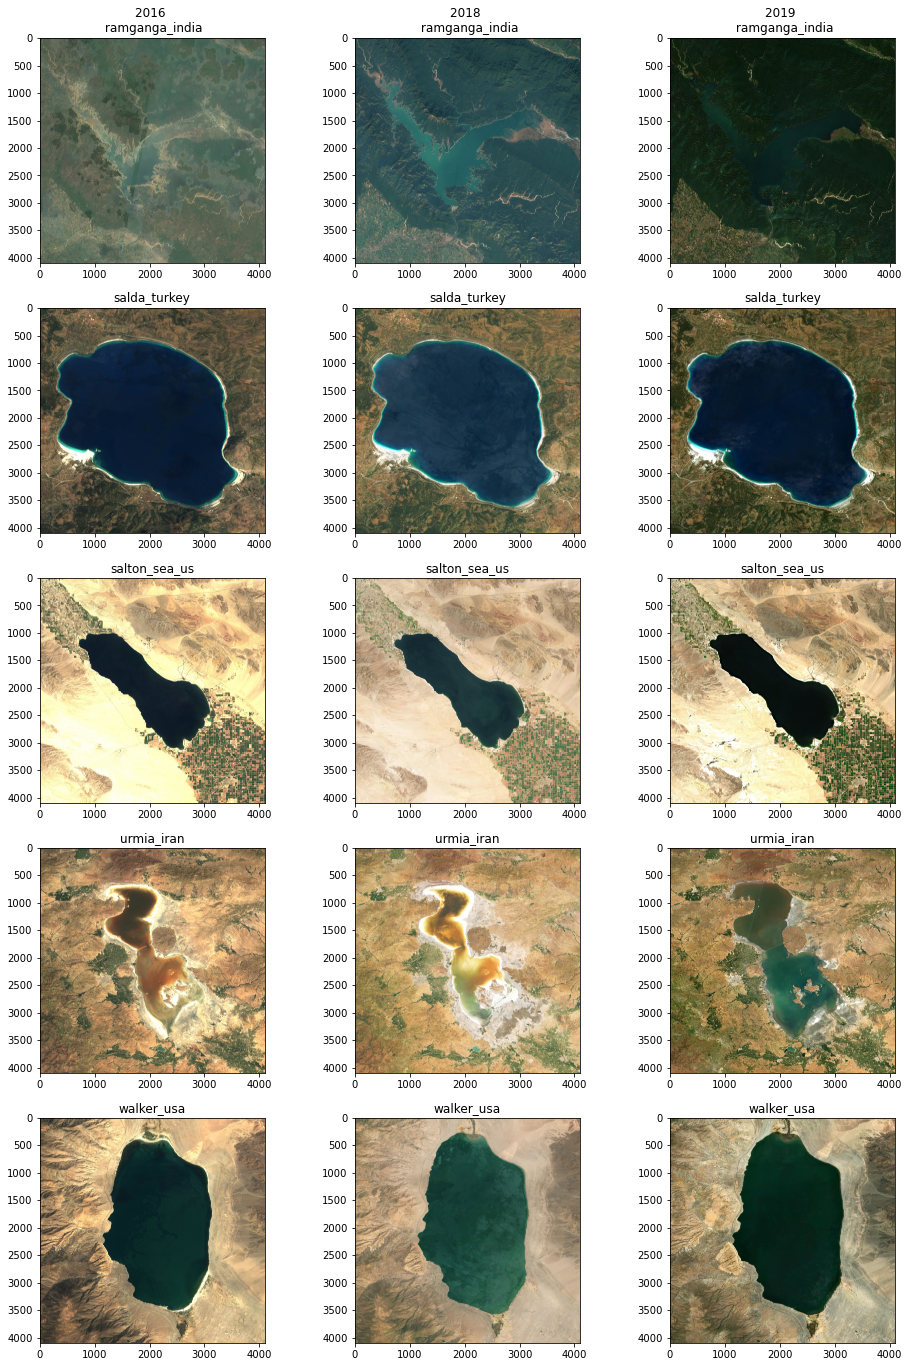

In [15]:
fig, ax = plt.subplots(5, 3, figsize=(16,24))
axs = ax.ravel()
for idx, site in enumerate(list(site_to_imag_map.keys())[-5:]):
    if idx==0:
        ax[idx, 0].set_title(f'2016 \n {site}')
        ax[idx, 1].set_title(f'2018 \n {site}')
        ax[idx, 2].set_title(f'2019 \n {site}')
    else:
        ax[idx, 0].set_title(site)
        ax[idx, 1].set_title(site)
        ax[idx, 2].set_title(site)
    imgs = site_to_imag_map[site]
    img_2016 = [x for x in imgs if x.stem.endswith('s2cloudless')][0]
    img_2018 = [x for x in imgs if x.stem.endswith('s2cloudless-2018')][0] 
    img_2019 = [x for x in imgs if x.stem.endswith('s2cloudless-2019')][0] 
    ax[idx, 0].imshow(plt.imread(img_2016))
    ax[idx,1].imshow(plt.imread(img_2018))
    ax[idx,2].imshow(plt.imread(img_2019))

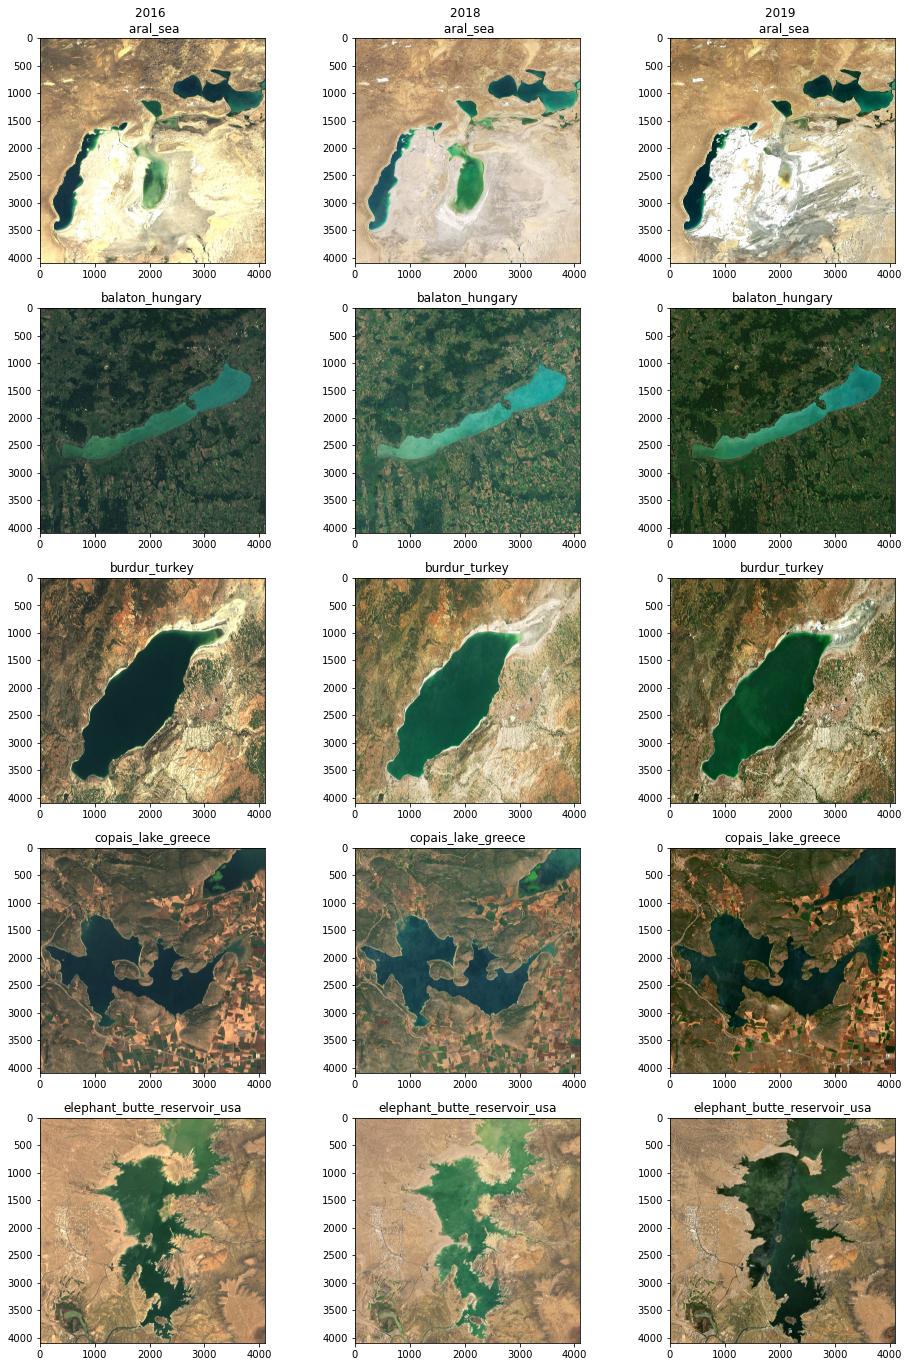

In [16]:
fig, ax = plt.subplots(5, 3, figsize=(16,24))
axs = ax.ravel()
for idx, site in enumerate(list(site_to_imag_map.keys())[:5]):
    if idx==0:
        ax[idx, 0].set_title(f'2016 \n {site}')
        ax[idx, 1].set_title(f'2018 \n {site}')
        ax[idx, 2].set_title(f'2019 \n {site}')
    else:
        ax[idx, 0].set_title(site)
        ax[idx, 1].set_title(site)
        ax[idx, 2].set_title(site)
    imgs = site_to_imag_map[site]
    img_2016 = [x for x in imgs if x.stem.endswith('s2cloudless')][0]
    img_2018 = [x for x in imgs if x.stem.endswith('s2cloudless-2018')][0] 
    img_2019 = [x for x in imgs if x.stem.endswith('s2cloudless-2019')][0] 
    ax[idx, 0].imshow(plt.imread(img_2016))
    ax[idx,1].imshow(plt.imread(img_2018))
    ax[idx,2].imshow(plt.imread(img_2019))

#### Labelled Data

In [20]:
json_labels_directory = data_directory /"s2cloudless_labels"
balaton_s2cloudless_2018 = json_labels_directory / 'balaton_s2cloudless-2018.json'

In [25]:
balaton_s2cloudless_2018_data = json.load(open(balaton_s2cloudless_2018))
balaton_s2cloudless_2018_data = balaton_s2cloudless_2018_data['balaton_s2cloudless-2018.jpg']
x = balaton_s2cloudless_2018_data['regions']['0']['shape_attributes']['all_points_x']
y = balaton_s2cloudless_2018_data['regions']['0']['shape_attributes']['all_points_y']

/home/wwymak/anaconda3/envs/tensorflow-dl/lib/python3.7/site-packages/rasterio/__init__.py:218: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


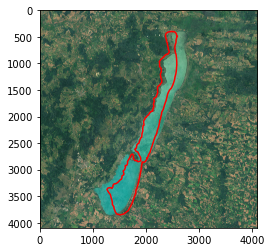

In [39]:
with rasterio.open(str(s2_cloudless_data_directory/'balaton_hungary_17.0_46.0_18.0_47.0_s2cloudless-2018.jpg')) as dataset:
    im = dataset.read().T
    plt.imshow(im)
    plt.plot(np.array(y) + 0.5 * (4096-3084),np.array(x),'r')

#### NWPU-RESISC45
dataset of land covers and uses